<h3> 1. 필요한 라이브러리 설치 </h3>

In [2]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 43.6 MB/s eta 0:00:00


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120828 files and direc

In [4]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-08-14 05:45:09--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-conten

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!pip3 install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255316 sha256=2b255ab33c62f1711fadf3cd35764ebae4c00911512eb1855b6903c8192c4df3
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


<h3> 2. 파일 불러오기 </h3>
<li> 토크나이징이 완료된 경우에는 pickle 파일 불러오기 </li>
<li> 토크나이징이 되지 않은 경우에는 AI Hub 원본 데이터 불러오기 </li>

In [ ]:
import pickle
import pandas as pd
## train data가 존재할 경우 저장해놓은 피클 불러오기
df = pd.read_pickle('/content/drive/MyDrive/train.pkl')
df[0]

In [15]:
import pickle5 as pickle

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from konlpy.tag import Okt
import os
from scipy.sparse import save_npz, load_npz
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  f1_score, roc_auc_score
import time

plt.rc('font', family='Malgun Gothic')
train_df = pd.read_excel('/content/drive/MyDrive/sentiment_analysis.xlsx')
train_df.head()

,번호,value,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3
0,24070,1,청년,여성,"진로, 취업, 직장",해당없음,기쁨,신이 난,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.
1,27879,1,청년,여성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,NaN,NaN
2,51471,1,중년,여성,"직장, 업무 스트레스",해당없음,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,NaN,NaN
3,7140,1,노년,남성,대인관계,만성질환 유,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.
4,39663,1,노년,남성,재정,만성질환 유,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,NaN,NaN


데이터 중에서 필요한 컬럼(대화 뭉치)만 이용(사람문장, 시스템응답)

In [23]:
train_df.fillna('', inplace = True)
train_df.drop(['번호', 'value' ,'연령', '성별', '상황키워드', '신체질환', '감정_소분류'],axis=1,inplace = True)

In [24]:
### 감성분석 성능 실험 위해 감정을 3가지로 분류해보는 것도 실험 ###
#### 실제로는 감정_대분류를 예측 label로 하여 설정함 ####
sentimential_list = {'행복' : 0, '기쁨': 0, '분노' : 1, '불안' : 1, '당황' : 2, '슬픔' : 2, '상처' : 2}
train_df['label'] = train_df['감정_대분류'].map(sentimential_list)
train_df.head()

,감정_대분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,label
0,기쁨,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.,0
1,기쁨,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,,,0
2,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,,,1
3,슬픔,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.,2
4,슬픔,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,,,2


텍스트 전처리 : text를 모든 문장을 합쳐서 처리<br>
<p> 사람문장과 시스템응답 문장들을 모두 합쳐서 하나의 text로 설정



In [25]:
train_df['text'] = train_df['사람문장1'] + ' ' + train_df['시스템응답1']  + ' ' + train_df['사람문장2'].map(str) + ' ' + train_df['시스템응답2']  + ' ' +train_df['사람문장3']  + ' ' + train_df['시스템응답3']
train_df['text'] = train_df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_df.drop_duplicates(subset = ['text'], inplace = True) #중복 제거

<ipython-input-25-2ad3c09bfc12>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['text'] = train_df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [26]:
print(sum(map(len, train_df['text'])) / len(train_df['text'])) # 평균 글자 수

156.32599047849592


<h3> 3. Data Augmentation </h3>
<li> KAIST에서 만든 Korean WordNet을 이용하여 Data Augmentation 시도 </li>
<li> Data Augmentation 구성 : 문장 순서 바꾸기, 문장 단어 유사한 단어로 바꾸기, 단어 추가 & 제거 </li>
<li> 결론적으로 성능이 높아지기는 했지만, train data에 너무 과적합되어서 실제 LSTM 모델 구축 시에는 포함하지 않음 </li>

In [ ]:
import random

wordnet = {}
with open("/content/drive/MyDrive/wordnet.pickle", "rb") as f:
	wordnet = pickle.load(f)

 # 한글만 남기고 나머지는 삭제
def get_only_hangul(line):
	parseText= re.compile('/ ^[ㄱ-ㅎㅏ-ㅣ가-힣]*$/').sub('',str(line))

	return parseText

########################################################################
# Synonym replacement
# wordnet에 유사한 단어가 존재하면 그 단어를 return
########################################################################
def get_synonyms(word):
	synomyms = []
	try:
		for syn in wordnet[word]:
			synomyms.append(syn)
	except:
		pass

	return synomyms

########################################################################
# Synonym replacement
# wordnet에 단어가 존재하는 경우에 유사한 단어로 바꿔줌
########################################################################
def synonym_replacement(words):
  new_words = words.copy()
  random_word_list = list(set([word for word in words]))
  random.shuffle(random_word_list)
  num_replaced = 0
  sentence = ""
  for random_word in random_word_list:
    synonyms = get_synonyms(random_word) ## 유사한 단어 추출
    if len(synonyms) >= 1: ## 유사한 단어가 있으면 유사한 단어로 바꿔준 문장을 추가함
      synonym = list(synonyms)
      new_words = [synonym[random.randrange(len(synonyms))] if word == random_word else word for word in new_words]
      sentence += ' '.join(new_words) + "\n"
      num_replaced += 1


  return sentence

## Data Augmentation을 본격적으로 진행하는 단계
def EDA(sentence, alpha_sr = 0.1, num_aug = 4):
  ## 형태소 분석기 선언
  okt = Okt()
  sentence = get_only_hangul(sentence)
  morphs = okt.morphs(sentence)
  num_of_morphs = len(morphs) ## 분할된 형태소 개수

  augmented_sentences = []
  num_new_per_technique = num_aug

  ## 한 문장당 augmentation을 진행할 개수 (4)
  for i in range(num_new_per_technique):
    a_words = synonym_replacement(morphs)
    augmented_sentences = a_words.split('\n') ## augmented된 sentence 반환

    augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]

    augmented_sentences.append(sentence)
    return [sentence for sentence in list(set(augmented_sentences)) if sentence is not ""]

<h3> 3-1. Data Augmentation 없이 Okt로 토큰화 진행 </h3>

In [35]:
x_data = train_df['text']
y_data = train_df['감정_대분류']

X_train_data, X_test_data, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, stratify = y_data, random_state = 42)
X_train_data.shape, X_test_data.shape, y_train.shape, y_test.shape

((55768,), (18590,), (55768,), (18590,))

시간이 매우 오래걸리기 때문에, 처음에 okt 진행 시에 pickle 파일로 저장. 나중에 처음 시작할 때 파일 경로 불러오면 됌

In [36]:
#불용어 처리
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '것','적', '내', '때'] ## 불용어 제거

X_train = []
X_test = []

########################################################################
# 형태소 분석기 이용하여 토크나이징 진행
# 토크나이징 된 것을 pickle 파일로 저장
########################################################################

if not os.path.isfile('/content/drive/MyDrive/train.pkl'):
  for sentence in tqdm(X_train_data):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_train.append(stopwords_removed_sentence)
  with open("/content/drive/MyDrive/train.pkl","wb") as f:
    pickle.dump(X_train, f)
  for sentence in tqdm(X_test_data):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_test.append(stopwords_removed_sentence)
  with open("/content/drive/MyDrive/test.pkl","wb") as f:
      pickle.dump(X_test, f)
else:
    with open("/content/drive/MyDrive/train.pkl","rb") as f:
        X_train = pickle.load(f)
    with open("/content/drive/MyDrive/test.pkl", "rb") as f:
        X_test = pickle.load(f)

<h3> 3-2. 텍스트를 벡터화 진행하기 </h3>

<li> 토크나이징 된 결과의 형태를 숫자로 표현하기
ex. '슬프다' -> 1, '기쁘다' -> 2와 같이 단어를 숫자로 바꾸기 </li>
<li> 등장빈도가 적은 희귀 단어를 제외하고 학습하기 -> 총 3758개의 단어</li>

In [37]:
########################################################################
# 토크나이징 된 결과를 이용하여 단어를 숫자로 바꾸는 과정
# 희귀 단어 제외하고 학습하기
########################################################################

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 30
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

vocab_size = total_cnt - rare_cnt + 1
vocab_size

print("학습된 총 단어의 크기 : ", vocab_size)

단어 집합(vocabulary)의 크기 : 17297
등장 빈도가 29번 이하인 희귀 단어의 수: 13540
단어 집합에서 희귀 단어의 비율: 78.27947042839799
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.9549672911589573
학습된 총 단어의 크기 :  3758


In [38]:
########################################################################
# 학습되는 총 단어의 크기로 다시 tokenizing
# 토크나이징 된 것을 pickle 파일로 저장
########################################################################

total_cnt = vocab_size
tokenizer = Tokenizer(total_cnt)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

with open('/content/drive/MyDrive/tokenizer2.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle)

리뷰의 최대 길이 : 151
리뷰의 평균 길이 : 43.60776789556735


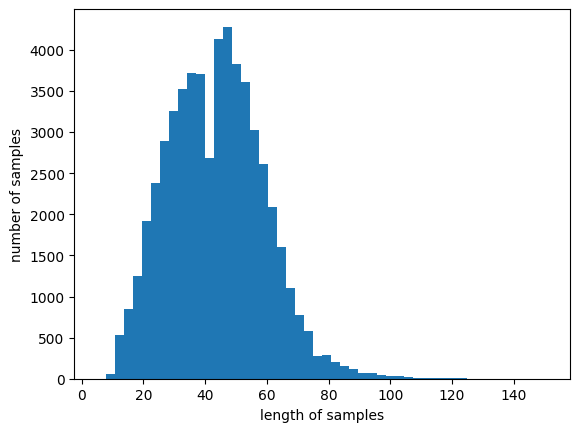

In [31]:
########################################################################
# 전체적으로 문장의 길이가 어떻게 되는 지 파악하기 => padding sequence에 사용
########################################################################

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
########################################################################
# 전체적으로 문장의 길이가 어떻게 되는 지 파악하기 => padding sequence에 사용
########################################################################

def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 70
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 70 이하인 샘플의 비율: 95.73231960981208


In [40]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

<h3> 4. 감성 분석 위해 y 라벨을 인코딩하기

In [41]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_train = to_categorical(y_train)
y_test = encoder.transform(y_test)
y_test = to_categorical(y_test)

In [42]:
encoder.classes_

array(['기쁨', '당황', '분노', '불안', '상처', '슬픔'], dtype=object)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55768, 70), (18590, 70), (55768, 6), (18590, 6))

<h3> 5. LSTM 모델을 이용하여 감성분석 진행하기 </h3>

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 70
hidden_units = 64
num_classes = 6

model = Sequential()
model.add(Embedding(total_cnt, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
chkpoint_filepath = "/content/drive/MyDrive/sentiment_analysis.h5"

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 3)
mc = ModelCheckpoint(filepath = chkpoint_filepath, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.25, verbose = 1)

Epoch 1/15
653/654 [============================>.] - ETA: 0s - loss: 1.3531 - accuracy: 0.4606
Epoch 1: val_accuracy improved from -inf to 0.65148, saving model to /content/drive/MyDrive/sentiment_analysis.h5
654/654 [==============================] - 40s 54ms/step - loss: 1.3528 - accuracy: 0.4607 - val_loss: 1.0288 - val_accuracy: 0.6515
Epoch 2/15
653/654 [============================>.] - ETA: 0s - loss: 0.9677 - accuracy: 0.6799
Epoch 2: val_accuracy improved from 0.65148 to 0.68333, saving model to /content/drive/MyDrive/sentiment_analysis.h5
654/654 [==============================] - 31s 47ms/step - loss: 0.9677 - accuracy: 0.6799 - val_loss: 0.9360 - val_accuracy: 0.6833
Epoch 3/15
653/654 [============================>.] - ETA: 0s - loss: 0.8747 - accuracy: 0.7123
Epoch 3: val_accuracy improved from 0.68333 to 0.68455, saving model to /content/drive/MyDrive/sentiment_analysis.h5
654/654 [==============================] - 30s 46ms/step - loss: 0.8746 - accuracy: 0.7124 - val_l

<h3> 6. (번외) 머신러닝 모델을 이용하여 감성분석 모델 예측하기 </h3>
embedding을 하는 부분이 따로 없어서 tf-idf로 벡터화 진행 후 머신러닝 기반으로 예측<br>
감정 라벨을 6개로 할 경우 정확도가 17%이기 때문에, 3개로 간단하게 해서 실험

In [ ]:
def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

def transform_data(x_train, x_test):
  if not os.path.isfile('/content/drive/MyDrive/okt_train.npz'):
    tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
    tfidf.fit(x_train)
    x_train_okt = tfidf.transform(x_train)
    x_test_okt = tfidf.transform(x_test)
    save_npz('/content/drive/MyDrive/okt_train.npz', x_train_okt)
    save_npz('/content/drive/MyDrive/okt_test.npz', x_test_okt)
  else:
    x_train_okt = load_npz('/content/drive/MyDrive/okt_train.npz')
    x_test_okt = load_npz('/content/drive/MyDrive/okt_test.npz')

    return x_train_okt, x_test_okt

In [ ]:
def light_gbm_train(x_train_okt, x_test_okt, y_train, y_test):
  start = time.time()
  lgbm_clf = LGBMClassifier(n_estimators = 400, n_jobs = -1, verbose = 1)
  lgbm_clf.fit(x_train_okt, y_train)
  preds = lgbm_clf.predict(x_test_okt)
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')
  print('LGBM Classifier accuracy score : ', accuracy_score(y_test, preds))
  print("LGBM Classifier\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))
  print('LGBM Classifier 분류 걸린 시간 : ', time.time() - start)

In [ ]:
def LogisticRegression_train(x_train_okt, x_test_okt, y_train, y_test):
  start = time.time()
  clf = LogisticRegression(max_iter = 1000, random_state = 0)
  clf.fit(x_train_okt, y_train)
  preds = clf.predict(x_test_okt)
  print('LogisticRegression accuracy score : ', accuracy_score(y_test, preds))
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("Logistic Regression general set\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))
  print('Logistic Regression 걸린 시간 : ', time.time() - start)

In [ ]:
def LogisticRegression_liblinear(x_train_okt, x_test_okt, y_train, y_test):
  start = time.time()
  clf = LogisticRegression(max_iter = 1000, random_state = 0, solver = "liblinear", C = 3)
  clf.fit(x_train_okt, y_train)
  preds = clf.predict(x_test_okt)
  print('LogisticRegression_liblinear accuracy score : ', accuracy_score(y_test,  preds))
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("Logistic Regression liblinear")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))
  print('Logistic Regression liblinear 걸린 시간 : ', time.time() - start)

In [ ]:
def Logistic_with_CountVectorizer(x_data, y_data):
  start = time.time()
  count_vec = CountVectorizer(tokenizer = okt.morphs)
  x_train_data = count_vec.fit_transform(x_data)
  x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_data, test_size = 0.25, random_state = 156)
  clf = LogisticRegression(max_iter = 1000, solver = 'liblinear',)
  clf.fit(x_train, y_train)
  preds = clf.predict(x_test)
  print('Logistic with CountVectorizer accuracy score : ', accuracy_score(y_test, preds))
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("Logistic with CountVectorizer\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))
  print('Logistic with CountVectorizer 걸린 시간 : ', time.time() - start)

모델들을 함수의 형태로 저장하고 메인에서 함수를 호출하는 형태로 구현

In [ ]:
train_df['text'] = train_df['사람문장1'] + train_df['시스템응답1'] + train_df['사람문장2'].map(str) + train_df['시스템응답2'] + train_df['사람문장3'] + train_df['시스템응답3']
x_data =  train_df['text'].apply(lambda x : re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', " ", x)).values
y_data = train_df['label']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify = y_data, test_size = 0.25, random_state = 42)

okt = Okt()

if not os.path.isfile('second_train.npz'):
  tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
  tfidf.fit(x_train)
  x_train_okt = tfidf.transform(x_train)
  x_test_okt = tfidf.transform(x_test)
  save_npz('second_train.npz', x_train_okt)
  save_npz('second_test.npz', x_test_okt)
else:
  x_train_okt = load_npz('second_train.npz')
  x_test_okt = load_npz('second_test.npz')

print('===================전체 정확도=================')

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.fit_transform(y_train)

encoder = LabelEncoder()
encoder.fit(y_test)
y_test = encoder.fit_transform(y_test)

X_train, X_test = transform_data(x_train_okt, x_test_okt)
light_gbm_train(X_train, X_test, y_train, y_test)
LogisticRegression_train(X_train, X_test, y_train, y_test)
LogisticRegression_liblinear(X_train, X_test, y_train, y_test)
#Logistic_with_CountVectorizer(x_data, y_data)

===================전체 정확도=================
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 16.535293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 840042
[LightGBM] [Info] Number of data points in the train set: 55768, number of used features: 24407
[LightGBM] [Info] Start training from score -1.793339
[LightGBM] [Info] Start training from score -1.101000
[LightGBM] [Info] Start training from score -0.691034
LGBM Classifier accuracy score :  0.470575578267886
LGBM Classifier

[[  43  505 2545]
 [  70 1019 5093]
 [ 124 1505 7686]]
정확도: 0.4706
정밀도: 0.3934
재현율: 0.4706
f1: 0.3905
LGBM Classifier 분류 걸린 시간 :  415.4382266998291
LogisticRegression accuracy score :  0.464228079612695
Logistic Regression general set

[[   9  563 2521]
 [  26 1061 5095]
 [  35 1720 7560]]
정확도: 0.4642
정밀도: 0.3765
재현율: 0.4642
f1: 0.3844
Logistic Regression 걸린 시간 :  47.598690032958984
LogisticRegression_liblinear accuracy scor

In [ ]:
text = ["나 진짜 너 오늘 혼냄 ㅋ", "그 영화 진짜 너무 재밌었던 것 같아서 행복해",
        "요즘 인생 현타 겁나 옴 ㅋ", "나 오늘 시험 100점 맞을 겨", "짜증나", "나는 뭘 해도 안될거야", "너 때문에 내가 지금 너무 화난다."]
clf = LogisticRegression(max_iter = 1000, random_state = 0, solver = "liblinear", C = 3)
clf.fit(x_train_okt, y_train)
score = clf.predict(tfidf.transform(text))
print(score)
print(clf.predict_proba(tfidf.transform(text)))